# Task
Analyze the "Medical Cost Personal Dataset" to predict insurance claim amounts using a Linear Regression model. Visualize the impact of BMI, age, and smoking status on charges and evaluate the model using MAE and RMSE.

## Load the data

### Subtask:
Load the dataset from the specified source into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Prepare the data

### Subtask:
Handle categorical features and split the data into training and testing sets.


**Reasoning**:
Convert categorical features using one-hot encoding, separate features and target, and split the data into training and testing sets.



In [2]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Train the model

### Subtask:
Train a Linear Regression model on the training data.


**Reasoning**:
Import the LinearRegression model and fit it to the training data.



In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Visualize feature impact

### Subtask:
Create visualizations to show the relationship between BMI, age, smoking status, and insurance charges.


**Reasoning**:
Create the requested plots to visualize the relationships between the specified features and charges.



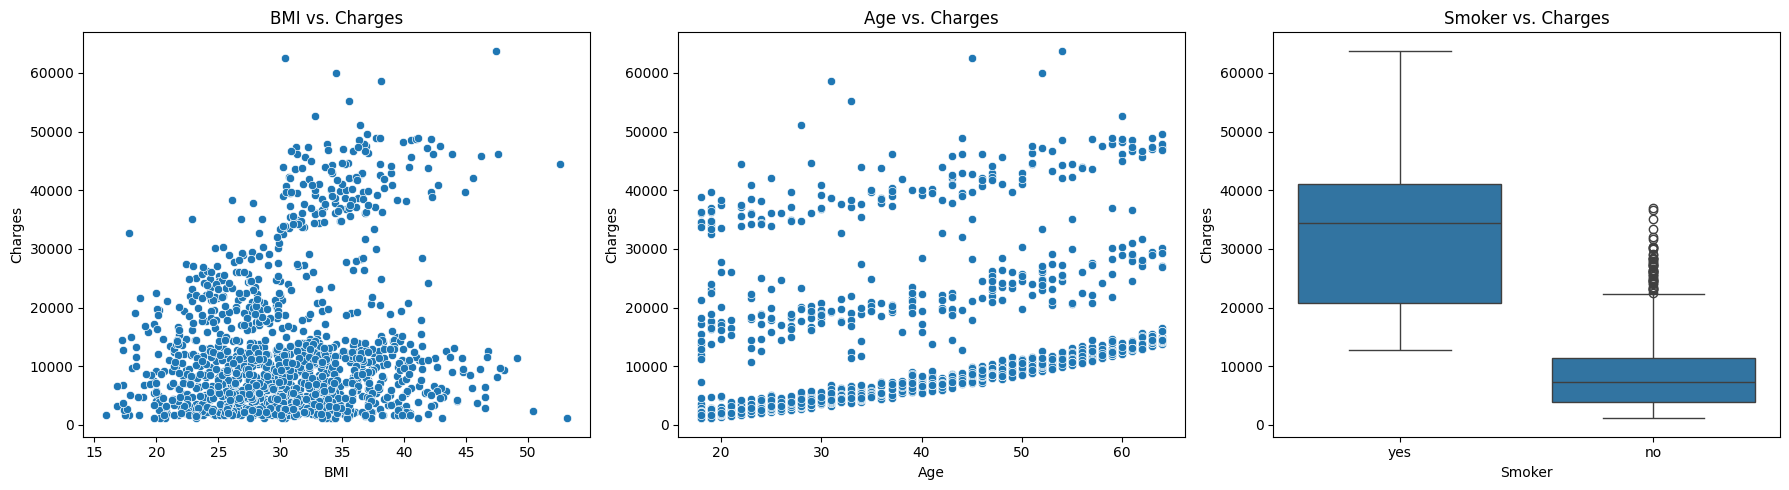

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

## Evaluate the model

### Subtask:
Make predictions on the test set and evaluate the model's performance using MAE and RMSE.


**Reasoning**:
Make predictions on the test set and evaluate the model's performance using MAE and RMSE.



In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


## Summary:

### Data Analysis Key Findings

*   One-hot encoding was applied to categorical features ('sex', 'smoker', 'region'), and the data was split into training and testing sets (80/20 ratio). The training feature set has 1070 samples and 8 features, while the test set has 268 samples and 8 features.
*   A Linear Regression model was successfully trained on the prepared training data.
*   Visualizations showed the relationships between BMI, age, smoking status, and charges. A clear separation in charges is visible between smokers and non-smokers, with smokers having significantly higher charges. Age also shows a positive correlation with charges. BMI shows a less clear linear correlation, but a general trend of increasing charges with higher BMI is present.
*   The trained model achieved a Mean Absolute Error (MAE) of \$4181.19 and a Root Mean Squared Error (RMSE) of \$5796.28 on the test set.

### Insights or Next Steps

*   The visualizations highlight that smoking status is a significant driver of insurance charges.
*   The MAE and RMSE values indicate that the model has a reasonable level of accuracy for predicting insurance charges, with an average absolute error of around \$4181.
